# Data preprocessing

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting into the Train set and Test set

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Featrue Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicting a new result

In [5]:
print(classifier.predict(sc.transform([[30, 87000]])))
#나이 30세에 연봉 $87,000인 고객의 SUV 구매 여부 예측
print(y_test[0])

[0]
0


# Predicting the Test set results

In [6]:
print(np.concatenate((classifier.predict(X_test).reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


# Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, classifier.predict(X_test)))

[[57  1]
 [ 5 17]]


# Visualising the Training set results

<ipython-input-9-cf7c303d375f>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


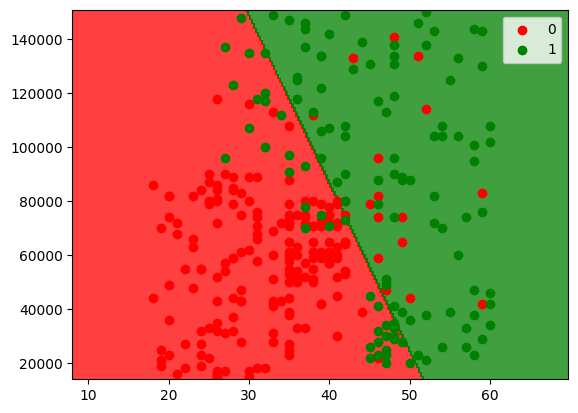

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#훈련 세트를 역스케일링하여 새 변수에 저장
X_set, y_set = sc.inverse_transform(X_train), y_train

#그래프의 X축, Y축에 들어갈 값 설정
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 10, X_set[:, 0].max() + 10, 0.25),
                     np.arange(X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000, 0.25))

#등치선 그래프 그리기
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# 축 범위 지정하기
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# 산점도 그리기
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

# 산점도 값 정보 표시
plt.legend()
plt.show()

<ipython-input-15-1561c4491cee>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test_set[y_test_set == j, 0], X_test_set[y_test_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


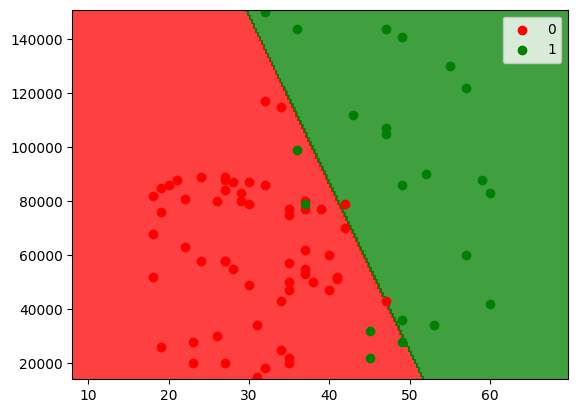

In [15]:
X_test_set, y_test_set = sc.inverse_transform(X_test), y_test

X1_test, X2_test = np.meshgrid(np.arange(X_test_set[:, 0].min() - 10, X_test_set[:, 0].max() + 10, 0.25),
                     np.arange(X_test_set[:, 1].min() - 1000, X_test_set[:, 1].max() + 1000, 0.25))

plt.contourf(X1_test, X2_test, classifier.predict(sc.transform(np.array([X1_test.ravel(), X2_test.ravel()]).T)).reshape(X1_test.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_test_set)):
    plt.scatter(X_test_set[y_test_set == j, 0], X_test_set[y_test_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.legend()

plt.show()